# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
print("RUN IT")
!pip -q install ./python 

RUN IT


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
#env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
from dqn_agent import Agent
from tqdm import tqdm
from collections import deque
import os

# if in gpu_mode, setup visible gpu device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import tensorflow as tf

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

State size: 37
Action size: 4
Network Ready


In [8]:
def dqn(brain_name,
        n_episodes = 2500, max_t = 1000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start
    total_steps = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)        # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        #
        total_steps.append(t)
        scores_window.append(score)       # save most recent score
        scores.append(score)
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}, mean steps to done: {:.2f}'.format(i_episode, np.mean(scores_window),np.mean(total_steps)))
        if np.mean(scores_window)>=25.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            agent.Qnetwork.save_model(model_name = './model_checkpoints/model.ckpt')
            break
    agent.Qnetwork.save_model(model_name = './model_checkpoints/final_model.ckpt')
    return scores

In [9]:
scores = dqn(brain_name = brain_name)

Episode 100	Average Score: 0.43, mean steps to done: 299.00
Episode 200	Average Score: 3.47, mean steps to done: 299.00
Episode 300	Average Score: 8.14, mean steps to done: 299.00
Episode 400	Average Score: 10.05, mean steps to done: 299.00
Episode 500	Average Score: 11.25, mean steps to done: 299.00
Episode 600	Average Score: 12.49, mean steps to done: 299.00
Episode 700	Average Score: 13.71, mean steps to done: 299.00
Episode 800	Average Score: 13.47, mean steps to done: 299.00
Episode 900	Average Score: 14.67, mean steps to done: 299.00
Episode 997	Average Score: 15.07
Environment solved in 897 episodes!	Average Score: 15.07
model saved
model saved


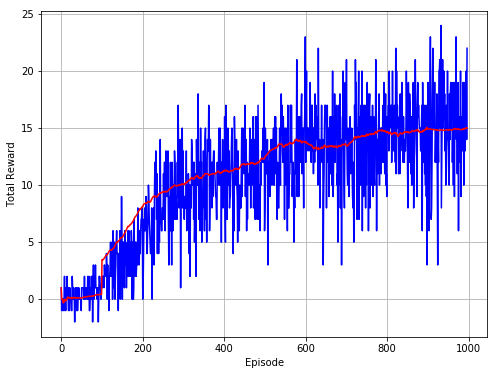

In [11]:
import matplotlib.pyplot as plt
def get_moving_mean(x, window_size):
    moving_mean = []
    for i,value in enumerate(x):
        if i < window_size:
            window = x[:(i+1)]
        elif (i >= window_size) & (i <= (len(x)-window_size)):
            window = x[i:(i+window_size)]
        else:
            window = x[(i-window_size):]
        moving_mean.append(np.mean(window))
    return moving_mean
moving_avg = get_moving_mean(scores, 100)

plt.figure(figsize=(8,6))
plt.plot(range(len(scores)), scores, 'b-')
plt.plot(range(len(moving_avg)), moving_avg, 'r-')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid()
plt.savefig("./img/mean_collected_reward.png")
plt.show()

### Test The Agent! (Or you can go to Performance_Check.ipynb)

In [1]:
from dqn_agent import Agent
from tqdm import tqdm
from collections import deque

agent = Agent(state_size=state_size, action_size=action_size)
agent.Qnetwork.load_model(model_name = './model_checkpoints/model.ckpt')

NameError: name 'state_size' is not defined

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)       # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    if reward == -1:
        print("Stupid agent!")
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    print('\rCurrent score: %.1f' % (score), end="")
    if done:                                       # exit loop if episode finished
        break
    
print("\r Final Score: {}".format(score))

 Final Score: 17.00
